In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import mode

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from imblearn.over_sampling import SMOTE

# Imports for better visualization
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

#rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

pd.set_option('display.max_columns', 500)

In [2]:
item = pd.read_json('item_details.json', lines = True)

In [4]:
item.tail(50)

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
82740,34.0,NaN,outerwear,a,fit,5ft 5in,NaN,807384,just right,4.0,"The fit is really nice, q","The fit is really nice, quality is good, and t...",9.0,NaN,12,200951,puyi78,NaN
82741,40.0,NaN,outerwear,d,fit,5ft 6in,50.0,807384,just right,4.0,Just got this coat and I,"Just got this coat and I couldn't be happier, ...",NaN,NaN,26,17514,dylanjrossman,NaN
82742,38.0,NaN,outerwear,dd/e,large,5ft 6in,47.0,807384,just right,3.0,This coat is glorious! Ni,This coat is glorious! Nice rich burnt orange ...,7.0,wide,20,898180,julie.a.johnson,NaN
82743,34.0,NaN,outerwear,a,fit,5ft,NaN,807722,just right,5.0,I bought this on Friday a,I bought this on Friday and got it today. It ...,7.0,NaN,4,711738,Susan,NaN
82744,42.0,NaN,outerwear,d,fit,5ft 5in,NaN,807722,just right,3.0,I like the jacket. Howeve,"I like the jacket. However, the quality and ma...",NaN,NaN,12,574877,cinternet5,NaN
82745,32.0,NaN,outerwear,b,fit,5ft 6in,37.0,807722,just right,5.0,"A great jacket, helps acc","A great jacket, helps accentuate small breasts...",NaN,NaN,12,348195,Siddie,NaN
82746,34.0,NaN,outerwear,c,small,5ft 8in,38.0,807722,just right,2.0,This feels like a sweatsh,This feels like a sweatshirt. It isn't a jacke...,NaN,NaN,8,516900,candyb32,NaN
82747,36.0,34,outerwear,b,fit,5ft 11in,38.0,807722,just right,3.0,I really like the look of,I really like the look of this jacket. The fab...,NaN,NaN,12,415686,Kelly,NaN
82748,34.0,NaN,outerwear,a,fit,5ft 5in,NaN,807722,just right,5.0,The jacket is a bit thinn,The jacket is a bit thinner than I thought. It...,NaN,NaN,8,176942,adriana_loves_th,NaN
82749,34.0,NaN,outerwear,a,fit,5ft 6in,35.0,807722,just right,3.0,Felt too much like Michae,Felt too much like Michael Jackson on me espe...,NaN,NaN,8,634240,trilliumfox,NaN


In [5]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
bra size          76772 non-null float64
bust              11854 non-null object
category          82790 non-null object
cup size          76535 non-null object
fit               82790 non-null object
height            81683 non-null object
hips              56064 non-null float64
item_id           82790 non-null int64
length            82755 non-null object
quality           82722 non-null float64
review_summary    76065 non-null object
review_text       76065 non-null object
shoe size         27915 non-null float64
shoe width        18607 non-null object
size              82790 non-null int64
user_id           82790 non-null int64
user_name         82790 non-null object
waist             2882 non-null float64
dtypes: float64(5), int64(3), object(10)
memory usage: 11.4+ MB


# EDA

Text(0.5, 1.0, 'Quality Rating')

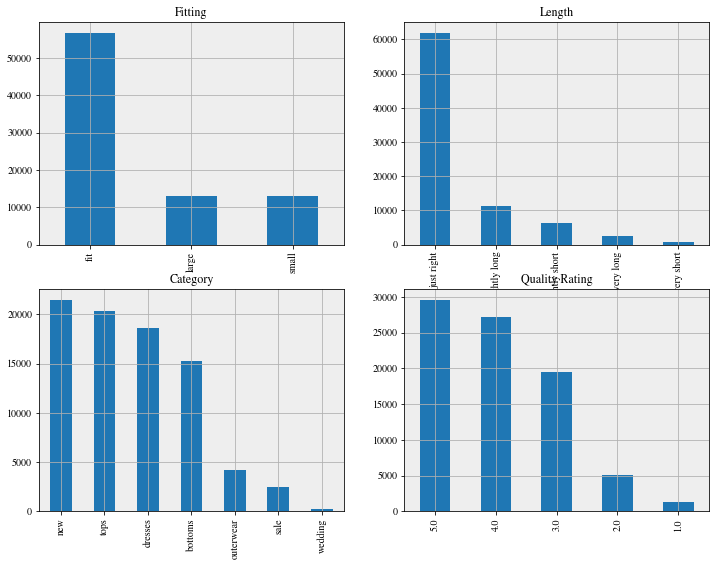

In [6]:
plt.figure(figsize = (12,9))

plt.subplot(221)
item.fit.value_counts().plot(kind = 'bar')
plt.title('Fitting')

plt.subplot(222)
item['length'].value_counts().plot(kind = 'bar')
plt.title('Length')

plt.subplot(223)
item['category'].value_counts().plot(kind = 'bar')
plt.title('Category')

plt.subplot(224)
item['quality'].value_counts().plot(kind = 'bar')
plt.title('Quality Rating')

In [7]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
item_missing = missing_values_table(item)
item_missing

Your selected dataframe has 18 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
waist,79908,96.5
bust,70936,85.7
shoe width,64183,77.5
shoe size,54875,66.3
hips,26726,32.3
review_summary,6725,8.1
review_text,6725,8.1
cup size,6255,7.6
bra size,6018,7.3
height,1107,1.3


In [9]:
item.head()

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,5ft 6in,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,5ft 2in,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,5ft 7in,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,5ft 2in,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN


## 1. waist

In [10]:
print('Percentage of missing values in waist = ', 100*item.waist.isnull().sum()/item.shape[0])

Percentage of missing values in waist =  96.51890324918469


## 2. size
###### size column does not have any null values

In [11]:
item['size'].value_counts().shape

(29,)

In [12]:
item['size'].describe()

count    82790.000000
mean        12.661602
std          8.271952
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         38.000000
Name: size, dtype: float64

## 3. cup size

In [13]:
item['cup size'].value_counts()

c         18370
d         16149
b         14628
dd/e      12557
ddd/f      6117
a          4791
dddd/g     2008
h          1042
aa          296
j           200
i           189
k           188
Name: cup size, dtype: int64

#### Note: According to online resources, cup sizes in increasing size are as follows:
aa, a, b, c, d, dd/e, ddd/f, dddd/g, h, i, j, k

In [14]:
item[item['cup size'].isnull()].sample(20)

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
33362,NaN,NaN,new,NaN,fit,5ft 3in,NaN,410934,just right,5.0,so soft and snuggly,so soft and snuggly,NaN,NaN,8,890654,stefanie.smuke,NaN
56033,NaN,NaN,tops,NaN,fit,5ft 6in,NaN,637907,just right,3.0,Love this top. Looks so,Love this top. Looks so cute with almost any ...,NaN,NaN,8,256583,maryann.warford,NaN
68170,32.0,32,bottoms,NaN,fit,5ft 7in,38.0,708060,just right,5.0,Love it!,I'm absolutely in love with this jumper! I was...,8.5,wide,12,68451,Fizzypop,29.0
2524,36.0,36,new,NaN,fit,5ft 9in,NaN,135552,just right,5.0,NaN,NaN,8.5,average,8,187463,opinionatedcoconut,NaN
70771,NaN,NaN,bottoms,NaN,fit,5ft,NaN,723977,slightly long,4.0,Besides the fact that it',Besides the fact that it's long. The material ...,NaN,NaN,8,677274,n.gisell94,NaN
23219,NaN,NaN,dresses,NaN,fit,5ft 5in,NaN,380801,just right,5.0,I love it! Got it in the,I love it! Got it in the mail the other day an...,NaN,NaN,26,381861,Lucretia,NaN
29344,NaN,NaN,new,NaN,fit,5ft 4in,40.0,403296,just right,5.0,Love this top! The patter,Love this top! The pattern is pretty and the o...,NaN,NaN,12,339058,lydi4b,NaN
71510,NaN,NaN,bottoms,NaN,fit,5ft 6in,35.0,726492,just right,5.0,So flattering and beautif,So flattering and beautiful! I have gotten mor...,NaN,NaN,4,914711,emilypaulino03,NaN
22497,NaN,NaN,dresses,NaN,fit,5ft 5in,NaN,353933,just right,3.0,One of my favorites. Rea,One of my favorites. Really comfortable.,7.0,NaN,12,270965,Alison,NaN
80019,NaN,NaN,outerwear,NaN,small,5ft 4in,NaN,792842,slightly short,3.0,"I loved this jacket, but","I loved this jacket, but it came in and was so...",NaN,NaN,12,510691,gammondenise,30.0


In [15]:
# Impute null cup size as Unknown

item['cup size'].fillna('Unknown', inplace=True)
item['cup size'] = item['cup size'].astype('category').cat.as_ordered()

## User Name

In [16]:
item.user_name.value_counts()
# item.user_name.nunique()

Sarah                  729
Jessica                497
Jennifer               447
Amanda                 445
Rachel                 365
Emily                  356
Stephanie              342
Laura                  337
Katie                  326
Ashley                 288
Erin                   279
Lauren                 279
Heather                277
Megan                  275
Nicole                 266
Elizabeth              266
Melissa                259
Sara                   251
Amy                    244
Michelle               235
Rebecca                235
Danielle               221
Kelly                  215
Kate                   177
Shannon                171
Samantha               167
Lisa                   162
Hannah                 150
Brittany               149
Mary                   147
                      ... 
angel51118               1
00izzyb                  1
andrewsclaire            1
anna.s.lukina            1
maggie.joe.cummings      1
lorgalore                1
D

#### Some users like Sarah, jessica, etc. have bought items more than once. 
It is also possible that records of such repeted customers are not recorded everytime they visit and this might be the reason behind too many null values in some fit-measurement features like weist, hips, etc.

In [17]:
item[item['user_name'] == 'Sarah'].isnull().sum()

bra size           34
bust              559
category            0
cup size            0
fit                 0
height             21
hips              235
item_id             0
length              0
quality             0
review_summary     59
review_text        59
shoe size         414
shoe width        545
size                0
user_id             0
user_name           0
waist             711
dtype: int64

#### This proves that measurements for Sarah are not recorded everytime she visits the store. But the body measurements may slightly vary from time to time. Thus, we will consider taking the average of available measurements for each such customer to impute corresponding null values. 

In [18]:
(pd.DataFrame(item.user_name.value_counts()).user_name > 1)

Sarah                   True
Jessica                 True
Jennifer                True
Amanda                  True
Rachel                  True
Emily                   True
Stephanie               True
Laura                   True
Katie                   True
Ashley                  True
Erin                    True
Lauren                  True
Heather                 True
Megan                   True
Nicole                  True
Elizabeth               True
Melissa                 True
Sara                    True
Amy                     True
Michelle                True
Rebecca                 True
Danielle                True
Kelly                   True
Kate                    True
Shannon                 True
Samantha                True
Lisa                    True
Hannah                  True
Brittany                True
Mary                    True
                       ...  
angel51118             False
00izzyb                False
andrewsclaire          False
anna.s.lukina 

In [19]:
df_user_name = pd.DataFrame(item.user_name.value_counts()).user_name > 1
user_name_index = pd.DataFrame(df_user_name).index

In [20]:
user_name_index_list = list(user_name_index)

In [21]:
for user in user_name_index_list:
    index_temp = item[item['user_name'] == user].index
    item.loc[index_temp, 'hips'] = np.sum(item['hips'][index_temp])/(item['hips'][index_temp].shape[0] - item['hips'][index_temp].isnull().sum())

In [22]:
# Converting bust feature from object type to float type 
item.loc[item[item['bust'] == '37-39'].index, 'bust'] = '38'
item['bust'] = item['bust'].astype(str).astype(float)

In [23]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
bra size          76772 non-null float64
bust              11854 non-null float64
category          82790 non-null object
cup size          82790 non-null category
fit               82790 non-null object
height            81683 non-null object
hips              56064 non-null float64
item_id           82790 non-null int64
length            82755 non-null object
quality           82722 non-null float64
review_summary    76065 non-null object
review_text       76065 non-null object
shoe size         27915 non-null float64
shoe width        18607 non-null object
size              82790 non-null int64
user_id           82790 non-null int64
user_name         82790 non-null object
waist             2882 non-null float64
dtypes: category(1), float64(6), int64(3), object(8)
memory usage: 10.8+ MB


In [24]:
missing_values_table(item)

Your selected dataframe has 18 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
waist,79908,96.5
bust,70936,85.7
shoe width,64183,77.5
shoe size,54875,66.3
hips,26726,32.3
review_summary,6725,8.1
review_text,6725,8.1
bra size,6018,7.3
height,1107,1.3
quality,68,0.1


## Height

In [25]:
missing_rows2 = item[item.height.isnull()].index
item.drop(missing_rows2, axis = 0, inplace=True)

In [26]:
# Converting height into centimeters

def centi_convert(t):
    try: 
        return (int(t[0])*30.48) + (int(t[4:-2])*2.54)
    except:
        return (int(t[0])*30.48)
item.height = item.height.apply(centi_convert)

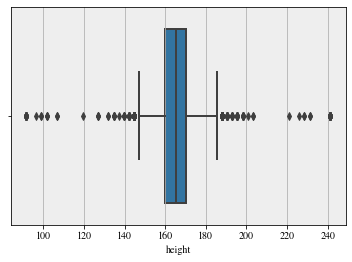

In [27]:
sns.boxplot(item.height)

#### Removing Outliers in height data

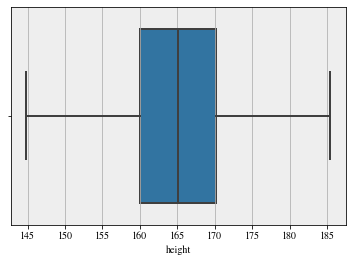

In [28]:
Q1 = item['height'].describe()['25%']
Q3 = item['height'].describe()['75%']
IQR = Q3 - Q1
cap_value_max = Q3 + 1.5 * IQR
cap_value_min = Q1 - 1.5 * IQR

item.loc[item[item['height'] > cap_value_max].index, 'height'] = cap_value_max
item.loc[item[item['height'] < cap_value_min].index, 'height'] = cap_value_min

sns.boxplot(item.height)

## fit

In [29]:
item.fit = item.fit.astype('category')

In [30]:
item.head()

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36.0,new,d,small,167.64,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,157.48,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,170.18,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
4,36.0,NaN,new,b,small,157.48,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN
5,36.0,NaN,new,c,small,162.56,41.0,123373,just right,5.0,NaN,NaN,NaN,NaN,11,162012,Doreenajane,27.0


#### Hips has >32% null values. We will bin the hips data on the basis of quartiles and impute null values as Unknown.

In [31]:
# Handling hips column
item.hips = item.hips.fillna(value = item.hips.mean())
bins = [0,31,37,40,44,75]
labels = ['XS','S','M', 'L','XL']
item.hips = pd.cut(item.hips, bins, labels=labels)

In [32]:
# Dropping rows with null values in length feature
missing_rows = item[item.length.isnull()].index
item.drop(missing_rows, axis = 0, inplace=True)

In [33]:
# Dropping rows with null values in quality feature
missing_rows = item[item.quality.isnull()].index
item.drop(missing_rows, axis = 0, inplace=True)

In [34]:
# Replacing Unknown values in cup size with most frequent value

index = item[item['cup size'] == 'Unknown'].index
item.loc[index, 'cup size'] = 'c'      # most frequent value after Unknown

In [35]:
item['shoe size'].value_counts()

8.5     3935
8.0     3766
7.5     3653
9.0     3518
7.0     3140
10.0    2388
6.5     1811
9.5     1794
6.0     1324
11.0     850
5.5      583
10.5     348
5.0      310
11.5      91
38.0       1
Name: shoe size, dtype: int64

#### Removing row with shoe size 38 (Practically impossible)

In [36]:
shoe_size_38_index = item[item['shoe size'] == 38].index
item.drop(shoe_size_38_index, axis = 0, inplace=True)

#### Imputing null shoe size as Unknown

In [37]:
# missing_rows = item[item.review_summary.isnull()].index
# item.drop(missing_rows, axis = 0, inplace=True)

# missing_rows1 = item[item.review_text.isnull()].index
# item.drop(missing_rows1, axis = 0, inplace=True)

item['shoe size'] = item['shoe size'].fillna('Unknown')
item['shoe size'] = item['shoe size'].astype('category').cat.as_ordered()

#### 1. Imputing null shoe width as Unknown
#### 2. Transforming shoe width into a categorical feature with attributes: 'narrow', 'average', 'wide'

In [38]:
from pandas.api.types import CategoricalDtype
shoe_widths_type = CategoricalDtype(categories=['Unknown','narrow','average','wide'], ordered=True)
item['shoe width'] = item['shoe width'].fillna('Unknown')
item['shoe width'] = item['shoe width'].astype(shoe_widths_type)

#### Dropping waist, bust, user_name columns

In [39]:
item.drop(['waist', 'bust', 'user_name'], axis=1, inplace=True)

missing_rows2 = item[item.height.isnull()].index
item.drop(missing_rows2, axis = 0, inplace=True)

missing_rows3 = item[item['bra size'].isnull()].index
item.drop(missing_rows3, axis = 0, inplace=True)

In [40]:
# item.drop(['shoe size', 'shoe width'], axis = 1, inplace = True)

In [41]:
item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76001 entries, 0 to 82789
Data columns (total 15 columns):
bra size          76001 non-null float64
category          76001 non-null object
cup size          76001 non-null category
fit               76001 non-null category
height            76001 non-null float64
hips              76001 non-null category
item_id           76001 non-null int64
length            76001 non-null object
quality           76001 non-null float64
review_summary    69744 non-null object
review_text       69744 non-null object
shoe size         76001 non-null category
shoe width        76001 non-null category
size              76001 non-null int64
user_id           76001 non-null int64
dtypes: category(5), float64(3), int64(3), object(4)
memory usage: 6.7+ MB


### One hot encoding the categorical features by creating dummy columns

In [42]:
item = pd.concat([item, pd.get_dummies(item['cup size'], prefix = 'cup_size')], axis = 1)

item = pd.concat([item, pd.get_dummies(item['hips'], prefix = 'hips')], axis = 1)

item = pd.concat([item, pd.get_dummies(item['category'], prefix = 'category')], axis = 1)

item = pd.concat([item, pd.get_dummies(item['length'], prefix = 'length')], axis = 1)

item = pd.concat([item, pd.get_dummies(item['shoe size'], prefix = 'shoe_size')], axis = 1)

item = pd.concat([item, pd.get_dummies(item['shoe width'], prefix = 'shoe_width')], axis = 1)

In [43]:
item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76001 entries, 0 to 82789
Data columns (total 64 columns):
bra size                 76001 non-null float64
category                 76001 non-null object
cup size                 76001 non-null category
fit                      76001 non-null category
height                   76001 non-null float64
hips                     76001 non-null category
item_id                  76001 non-null int64
length                   76001 non-null object
quality                  76001 non-null float64
review_summary           69744 non-null object
review_text              69744 non-null object
shoe size                76001 non-null category
shoe width               76001 non-null category
size                     76001 non-null int64
user_id                  76001 non-null int64
cup_size_Unknown         76001 non-null uint8
cup_size_a               76001 non-null uint8
cup_size_aa              76001 non-null uint8
cup_size_b               76001 non-nul

In [44]:
df_total = item.copy()

df_total.drop(['cup size', 'hips', 'length', 'category', 'shoe size', 'shoe width'], axis = 1, inplace = True)
# df_total.drop(['cup size', 'hips', 'length', 'category'], axis = 1, inplace = True)

df_total.drop(['review_text', 'review_summary', 'item_id', 'user_id'], axis = 1, inplace = True)

In [45]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76001 entries, 0 to 82789
Data columns (total 54 columns):
bra size                 76001 non-null float64
fit                      76001 non-null category
height                   76001 non-null float64
quality                  76001 non-null float64
size                     76001 non-null int64
cup_size_Unknown         76001 non-null uint8
cup_size_a               76001 non-null uint8
cup_size_aa              76001 non-null uint8
cup_size_b               76001 non-null uint8
cup_size_c               76001 non-null uint8
cup_size_d               76001 non-null uint8
cup_size_dd/e            76001 non-null uint8
cup_size_ddd/f           76001 non-null uint8
cup_size_dddd/g          76001 non-null uint8
cup_size_h               76001 non-null uint8
cup_size_i               76001 non-null uint8
cup_size_j               76001 non-null uint8
cup_size_k               76001 non-null uint8
hips_XS                  76001 non-null uint8
hips_S  

# Model

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df_total.drop(['fit'], axis = 1)
y = df_total['fit']
y.replace({'fit':0, 'large':1, 'small':2}, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
###################################################################

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, cohen_kappa_score 

In [50]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

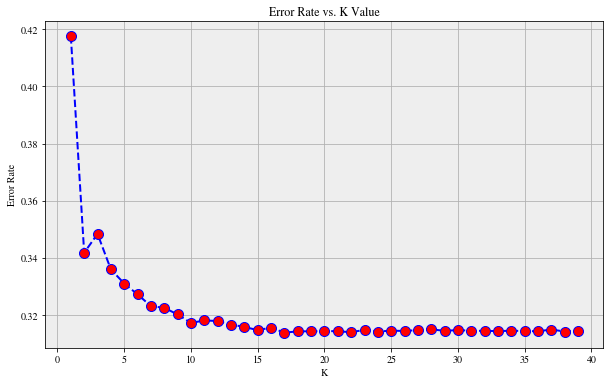

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Choosing no. of neighbours = 21

In [52]:
knn = KNeighborsClassifier(n_neighbors = 21).fit(X_train, y_train)

# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy)
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions)

0.6856185957497707


In [53]:
from sklearn.metrics import f1_score

f1_score(y_test, knn_predictions, average = None)

array([0.81321935, 0.03371057, 0.04744614])

In [54]:
confusion_matrix(y_test, knn_predictions)

array([[17028,    80,    91],
       [ 3870,    70,    32],
       [ 3781,    31,    98]], dtype=int64)

In [55]:
#################################################################

In [56]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred_rf = clf.predict(X_test)

In [57]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.6639687412782584


In [58]:
f1_score(y_test, y_pred_rf, average = None)

array([0.79089146, 0.28210117, 0.23731139])

In [59]:
feature_imp = pd.Series(clf.feature_importances_, index = X.columns).sort_values(ascending=False)
feature_imp

height                   0.226295
size                     0.138520
bra size                 0.109700
quality                  0.078794
cup_size_c               0.021118
cup_size_d               0.021013
hips_L                   0.019441
length_just right        0.019261
cup_size_dd/e            0.019095
shoe_size_Unknown        0.018437
cup_size_b               0.015631
hips_M                   0.014833
category_bottoms         0.014657
category_tops            0.014657
shoe_width_Unknown       0.014585
category_dresses         0.013944
shoe_width_average       0.013920
hips_S                   0.013788
category_new             0.013229
cup_size_ddd/f           0.012965
length_slightly long     0.012614
shoe_size_8.0            0.010310
hips_XL                  0.010250
shoe_size_8.5            0.010183
shoe_size_9.0            0.009609
shoe_size_7.5            0.009606
length_very long         0.009579
length_slightly short    0.009261
shoe_size_7.0            0.009007
category_outer

In [60]:
#################################################

In [61]:
from xgboost import XGBClassifier

#smote = SMOTE(sampling_strategy = 0.5)

#X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced', np.unique(df_total['fit']), df_total['fit']))

w_array = np.ones(y_train.shape[0], dtype = 'float')
for i, val in enumerate(y_train):
    w_array[i] = class_weights[val-1]

    
xgb = XGBClassifier(n_estimators = 100, scale_pos_weight = w_array, objective = 'multi:softprob')
model_xgb = xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

In [62]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))

Accuracy: 0.7029624018181093


In [63]:
f1_score(y_test, y_pred_xgb, average = None)

array([0.81994828, 0.24153815, 0.16695881])

In [64]:
feature_imp = pd.Series(xgb.feature_importances_, index = X.columns).sort_values(ascending=False)
feature_imp

length_slightly long     0.162161
length_very long         0.142650
length_just right        0.114190
quality                  0.107866
length_slightly short    0.049050
length_very short        0.047014
size                     0.034987
category_bottoms         0.032620
category_tops            0.032329
category_new             0.028328
category_dresses         0.022447
category_outerwear       0.014892
shoe_size_7.0            0.011982
bra size                 0.011912
category_sale            0.011055
hips_M                   0.007932
hips_L                   0.007760
cup_size_aa              0.007414
cup_size_a               0.007411
cup_size_k               0.007344
shoe_width_Unknown       0.007167
shoe_size_11.0           0.007123
hips_XL                  0.006966
shoe_size_7.5            0.006873
cup_size_dddd/g          0.006270
cup_size_i               0.006100
shoe_size_10.5           0.006007
shoe_size_Unknown        0.005820
shoe_width_average       0.005687
height        

# Conclusions:
#### 1. Out of KNN, Random Forest and XGB, XGBoost classifier gives best performmance on test set with accuracy 70.29%
#### 2. From feature importance, the features most important features for fit prediction are:
    1. length  2. size  3. bra size  4. quality  5. category